In [12]:
import pandas as pd
import numpy as np
from scipy import signal

# Charger les données filtrées à partir du fichier CSV
filtered_data = pd.read_csv('donnees_filtrees.csv')
print(filtered_data)

# Extraire la colonne contenant les données filtrées du signal ECG
filtered_ecg = filtered_data['MLII_filtered'].values

# Définir les seuils de détection des pics R
#seuil_min = np.mean(filtered_ecg) * 0.6
seuil_min = 150
#seuil_max = np.mean(filtered_ecg) * 1.2
seuil_max = 250

# Initialiser une liste pour stocker les indices des pics R
pic_r_indices = []

# Parcourir les échantillons du signal filtré
for i in range(1, len(filtered_ecg) - 1):
    # Vérifier si l'échantillon courant est un pic R potentiel
    if filtered_ecg[i] > filtered_ecg[i-1] and filtered_ecg[i] > filtered_ecg[i+1]:
        # Vérifier si l'amplitude du pic R est supérieure au seuil minimum et inférieure au seuil maximum
        if filtered_ecg[i] > seuil_min and filtered_ecg[i] < seuil_max:
            # Ajouter l'indice du pic R à la liste
            pic_r_indices.append(i)

# Afficher les indices des pics R détectés
print("Indices des pics R détectés :", pic_r_indices)

      Unnamed: 0  MLII_filtered
0              0       6.737742
1              1       6.617189
2              2       6.594770
3              3       6.753056
4              4       7.136781
...          ...            ...
1095        1095       3.803130
1096        1096       3.110218
1097        1097       3.036288
1098        1098       3.608004
1099        1099       4.587428

[1100 rows x 2 columns]
Indices des pics R détectés : [77, 370, 662, 947]


In [37]:
# Trouver l'indice du point maximum dans le signal filtré
max_index = np.argmax(filtered_ecg)

# Trouver la valeur du point maximum dans le signal filtré
max_value = filtered_ecg[max_index]

# Afficher l'indice et la valeur du point maximum
print("Indice du point maximum :", max_index)
print("Valeur du point maximum :", max_value)

Indice du point maximum : 370
Valeur du point maximum : 248.19851198642723


In [13]:
import pandas as pd

# Charger les données ECG à partir du fichier CSV
data = pd.read_csv('donnees_filtrees.csv')

# Extraire la colonne contenant les valeurs ECG
ecg_values = data['MLII_filtered'].values

# Fréquence d'échantillonnage (à adapter en fonction de votre signal)
frequence_echantillonnage = 360

# Calculer les temps correspondants aux indices
temps_correspondants = data.index / frequence_echantillonnage

# Ajouter une colonne "Temps" au DataFrame
data['Temps'] = temps_correspondants
print(data)

# Enregistrer les données mises à jour dans un nouveau fichier CSV
data.to_csv('donnees.csv', index=False)

      Unnamed: 0  MLII_filtered     Temps
0              0       6.737742  0.000000
1              1       6.617189  0.002778
2              2       6.594770  0.005556
3              3       6.753056  0.008333
4              4       7.136781  0.011111
...          ...            ...       ...
1095        1095       3.803130  3.041667
1096        1096       3.110218  3.044444
1097        1097       3.036288  3.047222
1098        1098       3.608004  3.050000
1099        1099       4.587428  3.052778

[1100 rows x 3 columns]


ReturnTuple(rpeaks=array([ 77, 370, 662, 947]))
positions Q :  ([65, 351, 658, 942], [62, 342, 656, 940])
Qpic 658
Qpic temps 1.827777777777778
Qpic temps 1.838888888888889
QR temps 11.111111111111072
positions S :  ([89, 388, 674, 959], [85, 385, 673, 955])
Indices des pics R : [ 77 370 662 946]
 Mesures   {'bpm': 74.48275862068965, 'ibi': 805.5555555555555, 'sdnn': 9.886183566695678, 'sdsd': 8.333333333333314, 'rmssd': 13.888888888888902, 'pnn20': 0.0, 'pnn50': 0.0, 'hr_mad': 2.7777777777778283, 'sd1': 5.892556509887882, 'sd2': 7.856742013183748, 's': 145.44410433285836, 'sd1/sd2': 0.750000000000009, 'breathingrate': nan}
{'RR_list': array([813.88888889, 811.11111111, 788.88888889]), 'RR_indices': [(77, 370), (370, 662), (662, 946)], 'RR_diff': array([ 2.77777778, 22.22222222]), 'RR_sqdiff': array([  7.71604938, 493.82716049])}
Intervalles R-R (s) : {'RR_list': array([813.88888889, 811.11111111, 788.88888889]), 'RR_indices': [(77, 370), (370, 662), (662, 946)], 'RR_diff': array([ 2.7

C:\Users\Owner\anaconda3\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


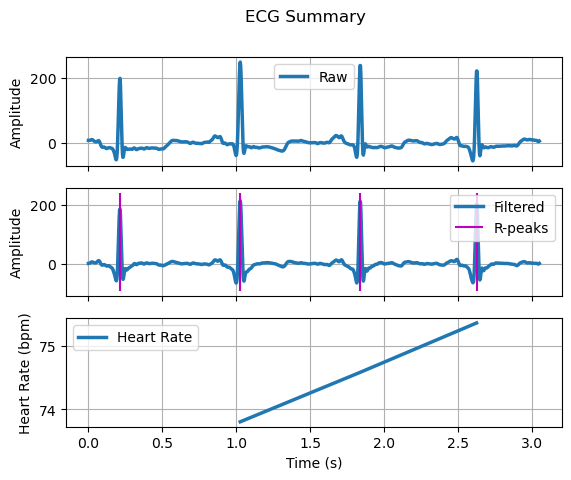

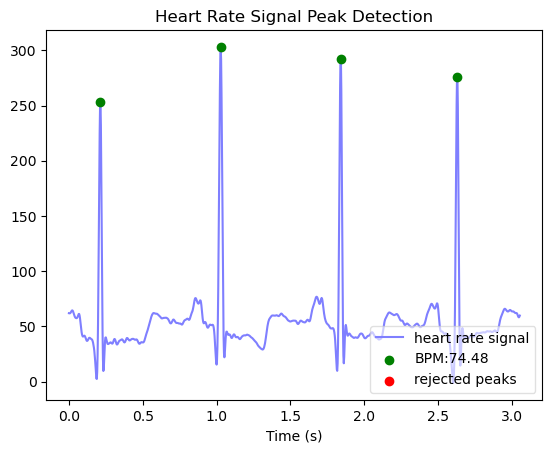

In [2]:
import numpy as np
import heartpy as hp
from heartpy.datautils import rolling_mean
from biosppy.signals import ecg

# Charger les données ECG à partir du fichier CSV
data = hp.get_data('donnees.csv', column_name='MLII_filtered')
out = ecg.ecg(signal=data, sampling_rate=360)
r_peaks = ecg.christov_segmenter(signal=data, sampling_rate=360)
print(r_peaks)
################################
#print("templates :  ",out["templates"])
################################
#Ppositions = ecg.getPPositions(out)
#print("positions P : ", Ppositions)

Qpositions = ecg.getQPositions(out)
print("positions Q : ", Qpositions)
Qpic = Qpositions[0][2]
print("Qpic", Qpic)
print("Qpic temps", Qpic*(1/360))
Rpic = 662*(1/360)
print("Qpic temps", 662*(1/360))

QR = (Rpic-Qpic*(1/360))*1000
print("QR temps", QR)



Spositions = ecg.getSPositions(out)
print("positions S : ", Spositions)

#Tpositions = ecg.getTPositions(out)
#print("positions T : ", Tpositions)
################################

# Afficher les indices des pics R
rpeaks_indices = out['rpeaks']
print("Indices des pics R :", rpeaks_indices)



# Fréquence d'échantillonnage
frequence_echantillonnage = 360

# Calculer les mesures à l'aide de heartpy
working_data, measures = hp.process(data, sample_rate=frequence_echantillonnage)
print(" Mesures  ",measures)
hp.plotter(working_data, measures)

##### Calcul de la variabilité de la fréquence cardiaque #####

# Calculer les intervalles R-R (RR intervals) et la fréquence cardiaque
rr_intervals = hp.analysis.calc_rr(rpeaks_indices, 360)  # Intervalles R-R en secondes
# Calculer la fréquence cardiaque moyenne à partir des intervalles R-R
print(rr_intervals)
# Calculer la différence moyenne des intervalles R-R
mean_rr_diff = np.mean(rpeaks_indices)
heart_rate = 60 / mean_rr_diff

# Afficher les intervalles R-R et la fréquence cardiaque
print("Intervalles R-R (s) :", rr_intervals)
print("Fréquence cardiaque (bpm) :", heart_rate) 
